#Theoretical Answer

1. Can we use Bagging for regression problems?
  - Yes, bagging can be effectively used for regression problems. Bagging (Bootstrap Aggregation) is an ensemble learning technique that can be applied to both classification and regression tasks.

2. What is the difference between multiple model training and single model training?
  - The multi-model approach is meant to achieve a greater level of accuracy for a set of specific tasks. A single LLM won't be as specialized or as accurate but it will be capable of more tasks.

3. Explain the concept of feature randomness in Random Forest?
  - In a Random Forest, feature randomness means that when growing each individual decision tree, the algorithm doesn't consider all possible features for splitting the data at each node.

4. What is OOB (Out-of-Bag) Score?
  - The Out-of-Bag (OOB) score is a validation technique used in ensemble methods like Random Forests to estimate a model's performance on unseen data. It leverages the concept of bagging, where each decision tree in the ensemble is trained on a random subset of the training data with replacement. The OOB score is calculated using the data points that were not included in the training set for each individual tree, effectively acting as a built-in validation set.

5. How can you measure the importance of features in a Random Forest model?
  - Feature importance in a random forest model can be measured using Gini importance (also known as mean decrease in impurity) or permutation importance. Gini importance is based on how much each feature reduces impurity (like Gini impurity or entropy) in the decision trees of the forest.

6. Explain the working principle of a Bagging Classifier.
  - A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

7. How do you evaluate a Bagging Classifier’s performance?
  - A Bagging Classifier's performance can be evaluated using various metrics, including accuracy, precision, recall, F1-score, and ROC AUC, depending on the specific task and data characteristics.

8. How does a Bagging Regressor work?
  - Bagging Regressor creates an ensemble of multiple base regression models and combines their predictions to produce a final prediction. In Bagging Regressor, the base model is typically a regression algorithm, such as Decision Tree Regressor.

9. What is the main advantage of ensemble techniques?
  - The primary advantage of ensemble techniques is increased predictive accuracy and robustness. By combining multiple models, ensemble methods can often achieve better performance than any single model alone, and they are also less prone to overfitting and noise in the data.

10. What is the main challenge of ensemble methods?
   - The primary challenge of ensemble methods is their increased complexity and computational cost compared to using a single model. Building and training multiple models, along with their subsequent aggregation, can be resource-intensive, requiring more time and computational power, especially with large datasets or complex base models.

11. Explain the key idea behind ensemble techniques.
   - The core idea is that a diverse group of models, even if individually weak, can collectively produce better results than any single model by leveraging each other's strengths and mitigating individual weaknesses.

12. What is a Random Forest Classifier?
   - A random forest classifier is a machine learning algorithm that uses an ensemble of decision trees to classify data. It works by building multiple decision trees on random subsets of the training data and then combining their predictions, typically through majority voting, to make a final classification.

13. What are the main types of ensemble techniques?
   - The main types of ensemble techniques in machine learning are bagging, boosting, and stacking.

14. What is ensemble learning in machine learning?
   - Ensemble learning in machine learning combines the predictions of multiple individual models to create a more robust and accurate predictive model. Instead of relying on a single model, it leverages the collective intelligence of several models to improve performance and reduce errors.

15. When should we avoid using ensemble methods?
  - Ensemble methods, while powerful, may not always be the best choice. They can be less suitable when computational resources are limited, when data is scarce, or when high interpretability is crucial. If the base models are highly correlated or if the primary goal is to understand the decision-making process of a single model, alternative approaches might be preferred.

16. How does Bagging help in reducing overfitting?
   - Bagging helps reduce overfitting by averaging predictions from multiple models trained on different subsets of the training data, which in turn reduces the variance of the overall model.

17. Why is Random Forest better than a single Decision Tree?
   - Random forest is generally better than a single decision tree because it reduces overfitting and improves accuracy through ensemble learning. By combining multiple decision trees, random forests create a more robust and reliable model that generalizes better to unseen data.

18. What is the role of bootstrap sampling in Bagging?
   - In bagging (Bootstrap Aggregating), bootstrap sampling is used to create multiple subsets of the original training data. These subsets, called bootstrap samples, are created by randomly sampling with replacement from the original dataset.

19. What are some real-world applications of ensemble techniques?
   - Ensemble techniques, which combine multiple machine learning models to improve accuracy and robustness, have various real-world applications. These include: fraud detection, disease prediction, financial forecasting, and image recognition. By leveraging multiple models, ensemble methods can reduce overfitting, increase accuracy, and provide more reliable predictions in complex scenarios.

20. What is the difference between Bagging and Boosting?
   - Bagging (Bootstrap Aggregating):

     Parallel Model Building: Bagging involves training multiple models simultaneously on different bootstrap samples (random subsets with replacement) of the training data.

     Focus on Variance Reduction: By averaging the predictions of these independent models, bagging aims to reduce the variance of the overall prediction, which can help mitigate overfitting.

     Examples: Random Forests is a popular example of bagging.

   - Boosting:

     Sequential Model Building:
     Boosting builds models one after another, with each model trained to correct the errors of the previous model.

     Focus on Bias Reduction:
     This sequential approach helps reduce bias in the overall model by focusing on instances that were misclassified by earlier models.

     Examples:
     AdaBoost, Gradient Boosting Machines (GBM), XGBoost, LightGBM are examples of boosting algorithms.

#Practical Answer

In [2]:
# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Base estimator: Decision Tree
base_dt = DecisionTreeClassifier(random_state=42)

# Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=base_dt,     # <-- updated argument name
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict
y_pred = bagging_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

Bagging Classifier Accuracy: 0.9333


In [3]:
# 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Base estimator: Decision Tree
base_dt = DecisionTreeRegressor(random_state=42)

# Bagging Regressor
bagging_reg = BaggingRegressor(
    estimator=base_dt,      # for scikit-learn >=1.2
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_reg.fit(X_train, y_train)

# Predict
y_pred = bagging_reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor Mean Squared Error (MSE): {mse:.4f}")

Bagging Regressor Mean Squared Error (MSE): 0.2579


In [4]:
# 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100, random_state=42
)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.4f}\n")

# Feature importances
importances = rf_clf.feature_importances_

# Print feature importances in descending order
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df.to_string(index=False))

Random Forest Accuracy: 0.9357

Feature Importances:
                Feature  Importance
   worst concave points    0.158955
             worst area    0.146962
        worst perimeter    0.085793
           worst radius    0.078952
            mean radius    0.077714
         mean perimeter    0.074234
    mean concave points    0.065869
         mean concavity    0.054281
              mean area    0.041657
        worst concavity    0.031362
      worst compactness    0.024985
             area error    0.019936
       worst smoothness    0.014164
          worst texture    0.013599
       mean compactness    0.013177
         worst symmetry    0.012647
           radius error    0.011605
worst fractal dimension    0.009073
        mean smoothness    0.008625
        perimeter error    0.008540
           mean texture    0.008158
fractal dimension error    0.006145
       smoothness error    0.005792
      compactness error    0.005754
        concavity error    0.004969
         sy

In [5]:
# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Single Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=100, random_state=42
)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Decision Tree Regressor MSE: {mse_dt:.4f}")
print(f"Random Forest Regressor MSE: {mse_rf:.4f}")

if mse_rf < mse_dt:
    print("\n✅ Random Forest performs better than a single Decision Tree.")
else:
    print("\n⚠️ Decision Tree performs better (unexpected on this dataset).")

Decision Tree Regressor MSE: 0.5280
Random Forest Regressor MSE: 0.2565

✅ Random Forest performs better than a single Decision Tree.


In [6]:
# 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Random Forest Classifier with OOB enabled
rf_clf = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    random_state=42
)

# Train the model
rf_clf.fit(X, y)

# OOB score
print(f"OOB Score: {rf_clf.oob_score_:.4f}")

OOB Score: 0.9613


In [8]:
# 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define base estimator: Support Vector Classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

# Define Bagging Classifier with SVM as base
bagging_clf = BaggingClassifier(
    estimator=svm,     # <-- updated here
    n_estimators=10,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)

# Train
bagging_clf.fit(X_train, y_train)

# Predict
y_pred = bagging_clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier with SVM Accuracy: {acc:.4f}")

Bagging Classifier with SVM Accuracy: 1.0000


In [9]:
# 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Different numbers of trees
n_trees_list = [1, 10, 50, 100, 200]

print(f"{'n_estimators':>12} | {'Accuracy':>9}")
print("-" * 25)

for n_trees in n_trees_list:
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{n_trees:12} | {acc:9.4f}")

n_estimators |  Accuracy
-------------------------
           1 |    1.0000
          10 |    1.0000
          50 |    1.0000
         100 |    1.0000
         200 |    1.0000


In [10]:
# 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base estimator: Logistic Regression
logreg = LogisticRegression(solver='liblinear', max_iter=500)

# Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=logreg,    # for sklearn ≥1.2
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

# Train
bagging_clf.fit(X_train, y_train)

# Predict probabilities
y_proba = bagging_clf.predict_proba(X_test)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"Bagging Classifier with Logistic Regression AUC: {auc:.4f}")

Bagging Classifier with Logistic Regression AUC: 0.9977


In [11]:
# 29. Train a Random Forest Regressor and analyze feature importance scores.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_reg.fit(X_train, y_train)

# Get feature importances
importances = rf_reg.feature_importances_

# Put into a DataFrame and sort
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feat_imp_df)

Feature Importance Scores:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


In [12]:
# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base estimator for Bagging: Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

# Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=dtree,
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

# Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=50,
    random_state=42
)

# Train Bagging
bagging_clf.fit(X_train, y_train)
y_pred_bag = bagging_clf.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

# Train Random Forest
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Compare
print(f"Bagging Classifier Accuracy:       {acc_bag:.4f}")
print(f"Random Forest Classifier Accuracy: {acc_rf:.4f}")

Bagging Classifier Accuracy:       1.0000
Random Forest Classifier Accuracy: 1.0000


In [13]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Predict on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with tuned RF: {acc:.4f}")

Best Parameters from GridSearchCV:
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Test set accuracy with tuned RF: 1.0000


In [14]:
# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Different numbers of estimators to try
n_estimators_list = [1, 10, 50, 100, 200]

print(f"{'n_estimators':>12} | {'MSE':>12} | {'R² Score':>9}")
print("-" * 40)

for n_estimators in n_estimators_list:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n_estimators,
        max_samples=0.8,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{n_estimators:12} | {mse:12.4f} | {r2:9.4f}")

n_estimators |          MSE |  R² Score
----------------------------------------
           1 |       0.6112 |    0.5336
          10 |       0.2936 |    0.7759
          50 |       0.2643 |    0.7983
         100 |       0.2599 |    0.8017
         200 |       0.2572 |    0.8037


In [15]:
# 33. Train a Random Forest Classifier and analyze misclassified samples.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100, random_state=42
)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {acc:.4f}")

# Find misclassified samples
misclassified_idx = (y_pred != y_test)

# Prepare DataFrame of misclassified samples
misclassified_df = pd.DataFrame(
    X_test[misclassified_idx],
    columns=iris.feature_names
)
misclassified_df['True Label'] = y_test[misclassified_idx]
misclassified_df['Predicted Label'] = y_pred[misclassified_idx]

print("\nMisclassified samples:")
print(misclassified_df)

Test set accuracy: 1.0000

Misclassified samples:
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), True Label, Predicted Label]
Index: []


In [16]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train single Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Train Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred_bag = bagging_clf.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

# Compare
print(f"Single Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Bagging Classifier Accuracy:   {acc_bag:.4f}")

Single Decision Tree Accuracy: 1.0000
Bagging Classifier Accuracy:   1.0000


Test set accuracy: 1.0000


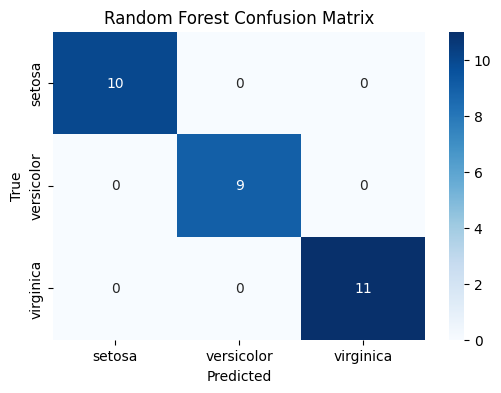

In [17]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
X, y = load_iris(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=load_iris().target_names,
            yticklabels=load_iris().target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [18]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base learners
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
logreg_clf = LogisticRegression(max_iter=500, random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('dt', dt_clf),
        ('svm', svm_clf),
        ('lr', logreg_clf)
    ],
    final_estimator=LogisticRegression(max_iter=500, random_state=42),
    cv=5,
    n_jobs=-1
)

# Fit and evaluate each individual model
models = {
    'Decision Tree': dt_clf,
    'SVM': svm_clf,
    'Logistic Regression': logreg_clf,
    'Stacking Classifier': stacking_clf
}

print(f"{'Model':<25} | {'Accuracy'}")
print("-" * 40)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:<25} | {acc:.4f}")

Model                     | Accuracy
----------------------------------------
Decision Tree             | 1.0000
SVM                       | 1.0000
Logistic Regression       | 1.0000
Stacking Classifier       | 1.0000


In [19]:
# 37. Train a Random Forest Classifier and print the top 5 most important features.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Get feature importances
importances = rf_clf.feature_importances_

# Create DataFrame of features & importance
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort and display top 5
top5 = feat_imp_df.sort_values(by='Importance', ascending=False).head(5)
print("Top 5 most important features:")
print(top5)

Top 5 most important features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


In [20]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

# Train
bagging_clf.fit(X_train, y_train)

# Predict
y_pred = bagging_clf.predict(X_test)

# Evaluate
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Precision: 0.9583
Recall:    0.9718
F1-score:  0.9650


 max_depth | Accuracy
-------------------------
      None | 1.0000
         1 | 1.0000
         2 | 1.0000
         3 | 1.0000
         5 | 1.0000
        10 | 1.0000


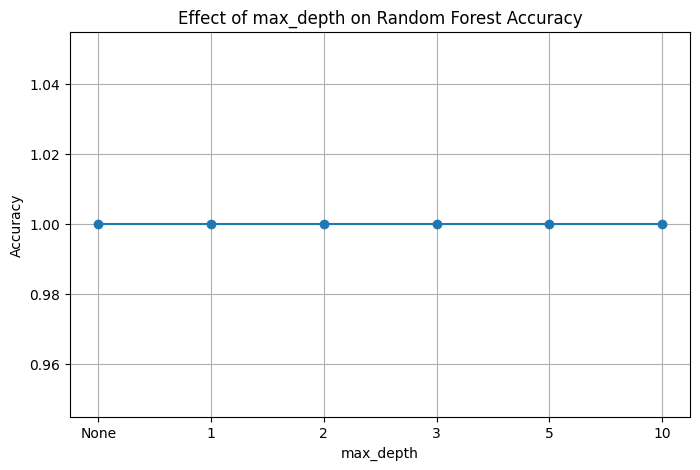

In [21]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
X, y = load_iris(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Range of max_depth values to test
max_depth_values = [None, 1, 2, 3, 5, 10]

results = []

print(f"{'max_depth':>10} | {'Accuracy'}")
print("-" * 25)

for depth in max_depth_values:
    rf_clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        random_state=42
    )
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((depth if depth is not None else 'None', acc))
    print(f"{str(depth):>10} | {acc:.4f}")

# Optional: Plot
depth_labels = [str(d) for d, _ in results]
accuracies = [acc for _, acc in results]

plt.figure(figsize=(8,5))
plt.plot(depth_labels, accuracies, marker='o')
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [22]:
# 40.  Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base estimators
dt = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor()

# Bagging with Decision Tree
bagging_dt = BaggingRegressor(
    estimator=dt,
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Bagging with KNeighbors
bagging_knn = BaggingRegressor(
    estimator=knn,
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

models = {
    "Bagging + DecisionTree": bagging_dt,
    "Bagging + KNeighbors": bagging_knn
}

print(f"{'Model':<25} | {'MSE':>10} | {'R²':>6}")
print("-" * 45)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name:<25} | {mse:10.4f} | {r2:6.4f}")

Model                     |        MSE |     R²
---------------------------------------------
Bagging + DecisionTree    |     0.2643 | 0.7983
Bagging + KNeighbors      |     1.0754 | 0.1793


In [23]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Predict probabilities
y_proba = rf_clf.predict_proba(X_test)[:, 1]  # probability of positive class

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Random Forest ROC-AUC Score: {roc_auc:.4f}")

Random Forest ROC-AUC Score: 0.9953


In [24]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validatio.

from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Load dataset
X, y = load_iris(return_X_y=True)

# Define Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Perform cross-validation
cv_scores = cross_val_score(
    bagging_clf, X, y,
    cv=5,             # 5-fold CV
    scoring='accuracy',
    n_jobs=-1
)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Std Deviation: {np.std(cv_scores):.4f}")

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Accuracy: 0.9600
Std Deviation: 0.0249


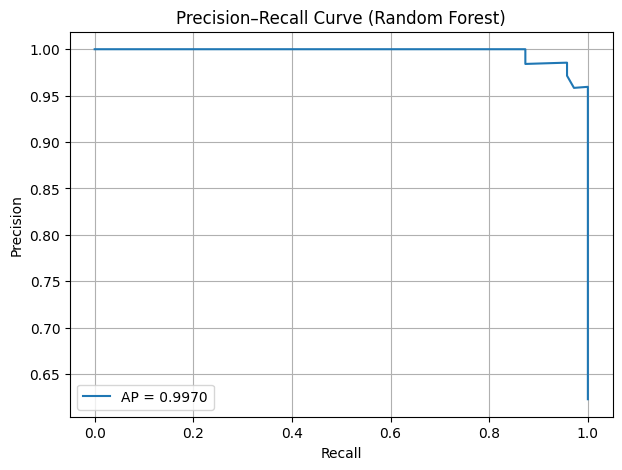

In [25]:
# 43. Train a Random Forest Classifier and plot the Precision-Recall curve.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Predict probabilities
y_proba = rf_clf.predict_proba(X_test)[:, 1]  # probability of positive class

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"AP = {avg_prec:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Random Forest)")
plt.legend()
plt.grid()
plt.show()


In [26]:
# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define base learners
rf_clf = RandomForestClassifier(
    n_estimators=100, random_state=42
)

logreg_clf = LogisticRegression(
    max_iter=500, random_state=42
)

# Define stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('lr', logreg_clf)
    ],
    final_estimator=LogisticRegression(max_iter=500, random_state=42),
    cv=5,
    n_jobs=-1
)

# Fit and evaluate each model
models = {
    "Random Forest": rf_clf,
    "Logistic Regression": logreg_clf,
    "Stacking Classifier": stacking_clf
}

print(f"{'Model':<25} | {'Accuracy'}")
print("-" * 40)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:<25} | {acc:.4f}")

Model                     | Accuracy
----------------------------------------
Random Forest             | 1.0000
Logistic Regression       | 1.0000
Stacking Classifier       | 1.0000


In [27]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Different bootstrap sample sizes to try
max_samples_list = [0.4, 0.6, 0.8, 1.0]

print(f"{'max_samples':>12} | {'MSE':>10} | {'R²':>6}")
print("-" * 35)

for max_samples in max_samples_list:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=max_samples,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{max_samples:12.2f} | {mse:10.4f} | {r2:6.4f}")

 max_samples |        MSE |     R²
-----------------------------------
        0.40 |     0.2718 | 0.7926
        0.60 |     0.2644 | 0.7982
        0.80 |     0.2643 | 0.7983
        1.00 |     0.2573 | 0.8036
